In [ ]:
pip install --user opencv-contrib-python

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Feature Detection Matching

## Reading image

In [5]:
img = cv2.imread("img.png")

## Color Conversion

In [7]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

## Scale Invariance

In [13]:
sc_iv = cv2.pyrDown(rgb)
sc_iv2 = cv2.pyrDown(sc_iv)
num_rows, num_cols = sc_iv2.shape[:2]

In [14]:
print(sc_iv2)

[[[ 94 168 242]
  [ 95 168 243]
  [ 95 169 244]
  ...
  [ 72 139 206]
  [ 73 140 206]
  [ 75 140 207]]

 [[ 92 166 241]
  [ 92 166 240]
  [ 93 167 243]
  ...
  [ 73 139 205]
  [ 74 140 206]
  [ 75 140 207]]

 [[ 88 163 238]
  [ 89 164 238]
  [ 91 164 241]
  ...
  [ 73 139 205]
  [ 74 140 207]
  [ 75 141 208]]

 ...

 [[ 25  45  75]
  [ 26  45  75]
  [ 26  45  75]
  ...
  [  3   3   4]
  [  3   3   4]
  [  3   3   4]]

 [[ 27  43  77]
  [ 26  43  76]
  [ 26  45  75]
  ...
  [  3   3   4]
  [  3   3   4]
  [  3   3   5]]

 [[ 27  43  73]
  [ 26  44  74]
  [ 26  46  75]
  ...
  [  3   3   4]
  [  3   3   5]
  [  3   3   5]]]


In [10]:
cv2.imshow("Orginal",img)
cv2.imshow("First Scale",sc_iv)
cv2.imshow("Second Scale",sc_iv2)
cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

## Rotation Invariance

In [18]:
rot_iv = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 45,0.5)

## Affine Transformation

In [19]:
aff = cv2.warpAffine(sc_iv,rot_iv, (num_cols, num_rows))

## Color Conversion

In [20]:
rot_gray = cv2.cvtColor(aff, cv2.COLOR_RGB2GRAY)

## Rotational Display

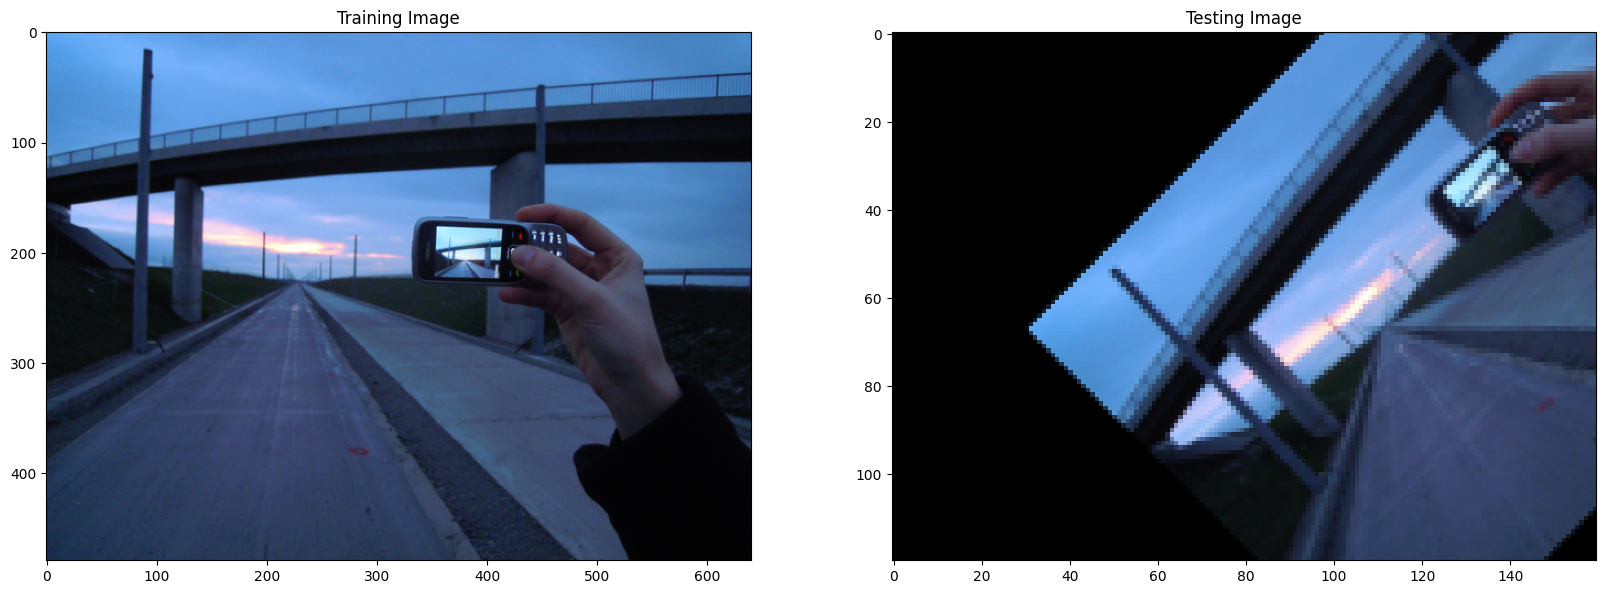

In [24]:
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(rgb)

plots[1].set_title("Testing Image")
plots[1].imshow(aff)

## SIFT (Scale Invariant Feature Transform)

In [25]:
sift = cv2.xfeatures2d.SIFT_create()

## Detect and Compute

In [26]:
train_kp, train_des = sift.detectAndCompute(gray, None)
test_kp, test_des = sift.detectAndCompute(rot_gray, None)

## Keypoints

In [27]:
kp_wo_size = np.copy(rgb)
kp_w_size = np.copy(rgb)

## Drawing Keypoints

In [28]:
cv2.drawKeypoints(rgb, train_kp, kp_wo_size, color = (0, 255 ,0))
cv2.drawKeypoints(rgb, train_kp, kp_w_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

array([[[ 95, 170, 244],
        [ 94, 171, 243],
        [ 97, 171, 243],
        ...,
        [ 68, 142, 211],
        [ 74, 141, 210],
        [ 77, 142, 210]],

       [[ 93, 171, 241],
        [ 95, 171, 242],
        [ 97, 168, 243],
        ...,
        [ 76, 140, 207],
        [ 78, 140, 205],
        [ 77, 140, 209]],

       [[ 96, 165, 246],
        [ 96, 164, 243],
        [ 91, 168, 243],
        ...,
        [ 77, 140, 207],
        [ 80, 141, 205],
        [ 81, 136, 206]],

       ...,

       [[ 24,  49,  69],
        [ 29,  39,  70],
        [ 25,  39,  65],
        ...,
        [  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6]],

       [[ 30,  42,  76],
        [ 27,  41,  73],
        [ 19,  46,  66],
        ...,
        [  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6]],

       [[ 31,  34,  60],
        [ 28,  40,  68],
        [ 23,  45,  69],
        ...,
        [  4,   4,   6],
        [  3,   3,   5],
        [  4,   4,   6]]

## Keypoints Displaying

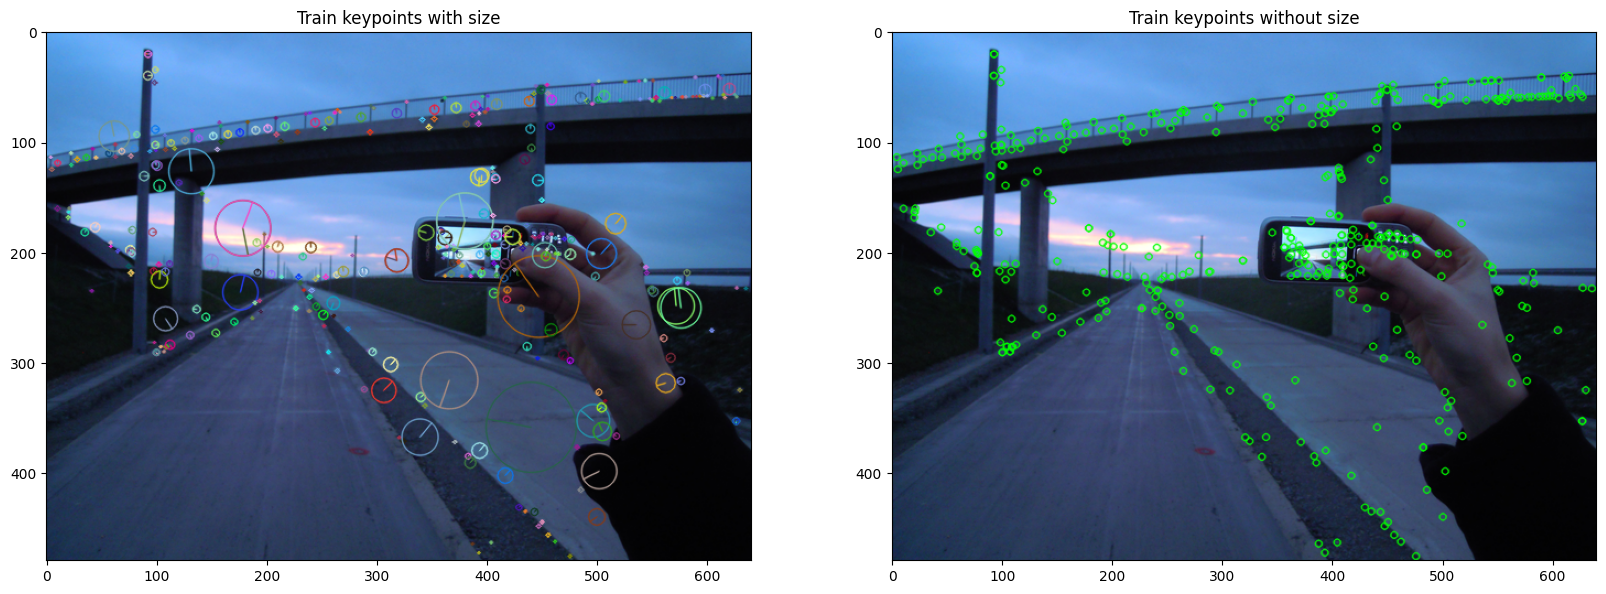

In [30]:
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints with size")
plots[0].imshow(kp_w_size, cmap = 'gray')

plots[1].set_title("Train keypoints without size")
plots[1].imshow(kp_wo_size, cmap = 'gray')

## Brute Force Matcher Object

In [31]:
bfm = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

## Matching

In [32]:
match = bfm.match(train_des, test_des)

## Sorting

In [34]:
match = sorted(match,key = lambda x : x.distance)

## Drawing Matches

In [35]:
result = cv2.drawMatches(rgb, train_kp, rot_gray, test_kp, match, rot_gray, flags = 2)

## Matching Display

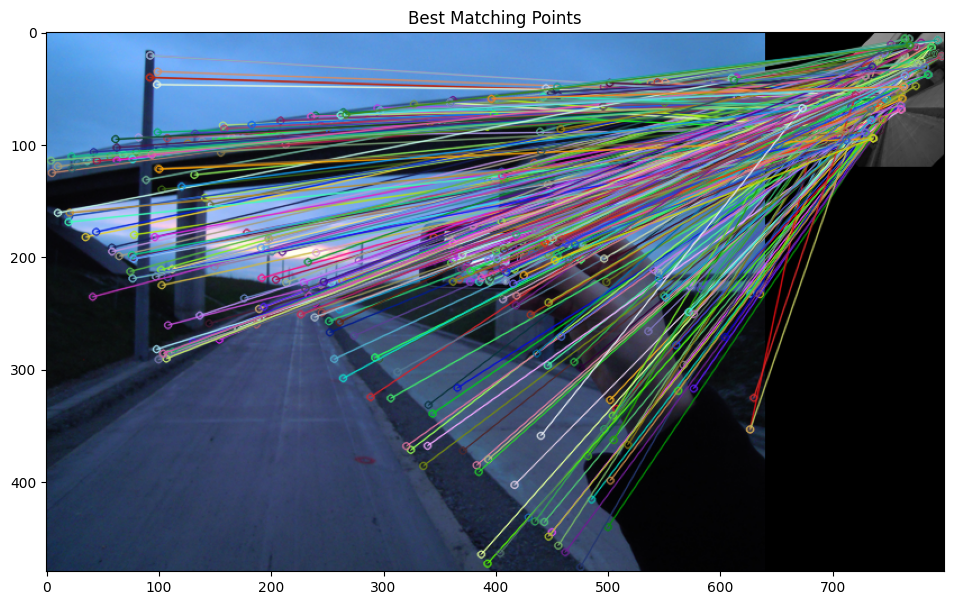

In [37]:
plt.rcParams["figure.figsize"] = [14.0, 7.0]
plt.title("Best Matching Points")
plt.imshow(result)
plt.show()